## Matched sample analysis

This notebook contains a short analysis on the matched sample. The datasets can be retrieved by running `data_to_analysis_matched.ipynv`. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.compat import lzip
import numpy as np

In [2]:
matched_sample = pd.read_csv("../../Data/analysis/matched_sample_analysis.csv", dtype={'matched b1-nummer':str}).iloc[:,1:]

In [3]:
stats.ttest_ind(matched_sample['nw0'].astype(float),
                matched_sample['Vermogen'].astype(float),
               nan_policy="omit")


Ttest_indResult(statistic=4.338617055982257, pvalue=1.8728385235835918e-05)

In [4]:
matched_sample['Vermogen'] = matched_sample['Vermogen'].astype(float)
matched_sample['nw0'] = matched_sample['nw0'].astype(float)

#mask = ~np.isnan(matched_sample['Vermogen']) & ~np.isnan(matched_sample['nw0'])

stats.ttest_1samp(matched_sample['nw0'] - matched_sample['Vermogen'], popmean = 0,nan_policy = "omit")

Ttest_1sampResult(statistic=3.6395756787763767, pvalue=0.0003917634897150848)

/Users/basmachielsen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/basmachielsen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


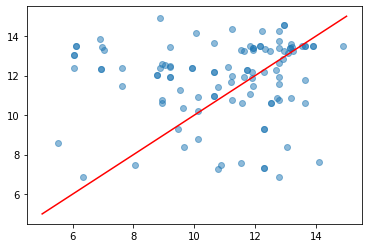

In [5]:
x = np.linspace(5,15,100)
y = x

plt.scatter(np.log(matched_sample['Vermogen']), np.log(matched_sample['nw0']), alpha = 0.5)
plt.plot(x, y, '-r', label='y=2x+1')
plt.show()

## Kernel density plots

/Users/basmachielsen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


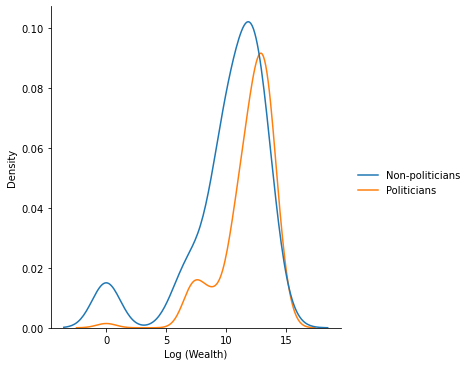

In [61]:
data = pd.concat([np.log(1+matched_sample['Vermogen']), 
                  np.log(1+matched_sample['nw0'])], 
                 keys=['Non-politicians','Politicians'],
                 axis = 1)

plt1 = (sns.displot(data, kind='kde').
        set_axis_labels(
            "Log (Wealth)", 
            "Density")
       )

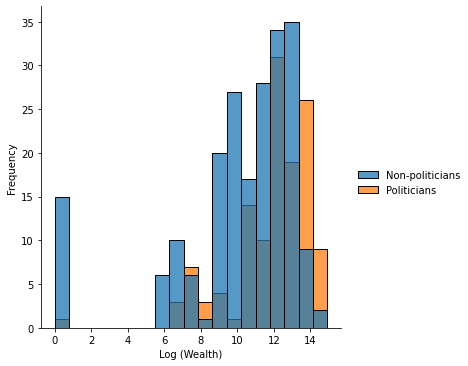

In [62]:
plt2 = sns.displot(data, kind='hist').set_axis_labels(
            "Log (Wealth)", 
            "Frequency")

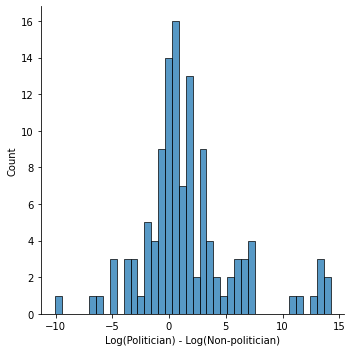

In [67]:
data['Difference'] = data['Politicians']-data['Non-politicians']

sns.displot(data['Difference'], kind = 'hist', bins=40).set_axis_labels("Log(Politician) - Log(Non-politician)")